In [1]:
import os
from dtw import *
import numpy as np
import librosa
import librosa.display
import moviepy.editor as mp
import matplotlib.pyplot as plt
from IPython.display import Audio

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
pip install dtw-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
y1, fs1 = librosa.load('C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\M05_B2_D6_M6.wav',sr=16000)
Audio(y1, rate=fs1)

In [4]:
y2, fs2 = librosa.load('C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\M05_B2_D4_M2.wav', sr=16000)
#print(mfcc2.shape)
Audio(y2, rate=fs2)

In [5]:
y3, fs3 = librosa.load('C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\F05_B2_D6_M3.wav', sr=16000)
#print(mfcc2.shape)
Audio(y3, rate=fs3)

In [6]:
sample_paths = [
    'C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\M05_B2_D6_M6.wav',
    'C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\M05_B2_D4_M2.wav',
   'C:\\Users\\Mansi\\Documents\\Dysarthria speech recoginazation\\F05_B2_D6_M3.wav'
]

In [7]:
songs = ["M05_B2_D6_M6", "M05_B2_D4_M2", "F05_B2_D6_M3"]

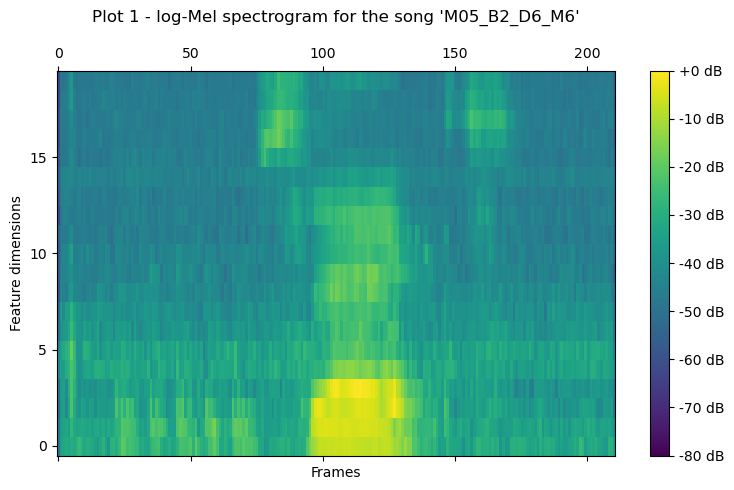

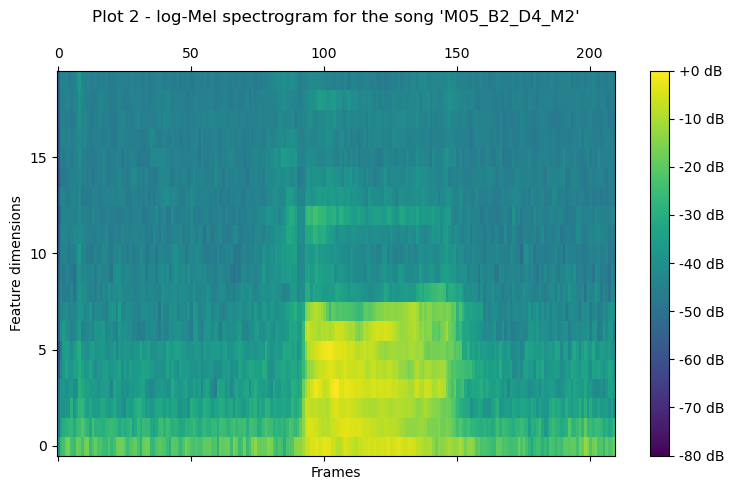

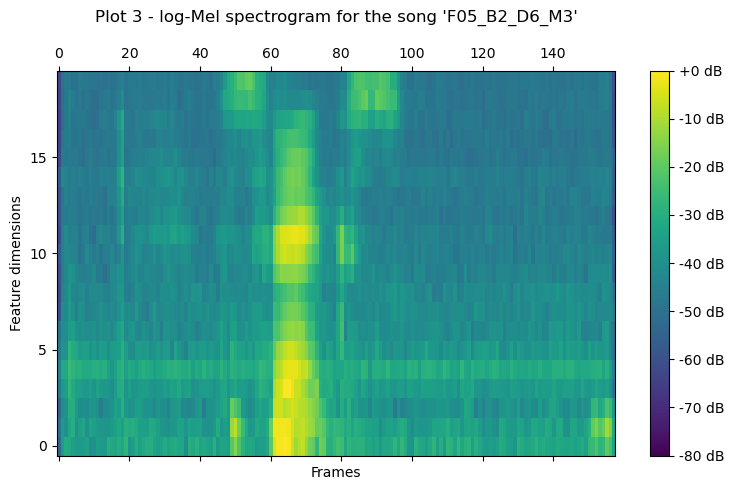

In [14]:

# Iterate through sample paths and plot log-Mel spectrograms
for i, sample_path in enumerate(sample_paths):
    y, f_s = librosa.load(sample_path, sr=16000)  # Reducing the sampling rate to 16 kHz
    y = librosa.util.normalize(y.astype(np.float32))

    # Mel-scale spectrogram with reduced resolution and fewer mel bins
    n_fft = int(0.025 * f_s)      # 25 ms
    hop_length = int(0.01 * f_s)  # 10 ms
    n_mels = 20  # Reduce the number of mel bins
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=f_s, n_mels=n_mels,
        n_fft=n_fft, hop_length=hop_length
    )
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot log-Mel spectrogram
    fig, ax = plt.subplots(figsize=(9, 5))
    cax = ax.matshow(log_mel_spec, origin="lower", cmap='viridis', aspect='auto', vmin=-80)
    plt.ylabel("Feature dimensions")
    plt.xlabel("Frames")
    plt.title(f"Plot {i+1} - log-Mel spectrogram for the song '{songs[i]}'", pad=35)
    plt.colorbar(cax, format='%+2.0f dB')
    plt.show()

In [15]:
log_mel_specs = []
for sample_path in sample_paths:
    y, f_s = librosa.load(sample_path, sr=16000)  # Reducing the sampling rate to 16 kHz

    # Mel-scale spectrogram with reduced resolution and fewer mel bins
    n_fft = int(0.025 * f_s)      # 25 ms
    hop_length = int(0.01 * f_s)  # 10 ms
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=f_s, n_mels=n_mels,
        n_fft=n_fft, hop_length=hop_length
    )
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Transpose for DTW analysis
    log_mel_spec = log_mel_spec.T

    log_mel_specs.append(log_mel_spec)

Normalized DTW Alignment Cost: 21.592730418080784


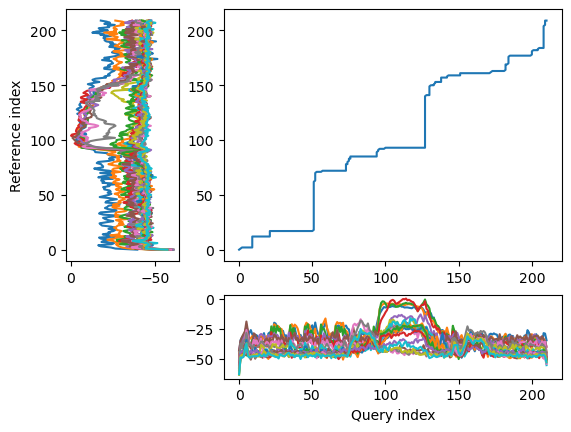

In [16]:
query = log_mel_specs[0]
template = log_mel_specs[1]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost1 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost:', normalized_alignment_cost1)

alignment.plot(type="threeway")

plt.show()


Normalized DTW Alignment Cost: 19.457168681241303


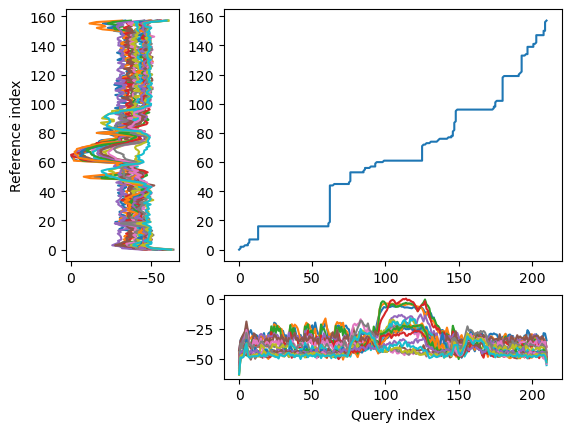

In [17]:
# Perform DTW between songs 1 and 3
query = log_mel_specs[0]
template = log_mel_specs[2]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost2 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost:', normalized_alignment_cost2)

alignment.plot(type="threeway")

plt.show()

Normalized DTW Alignment Cost: 25.076009902621532


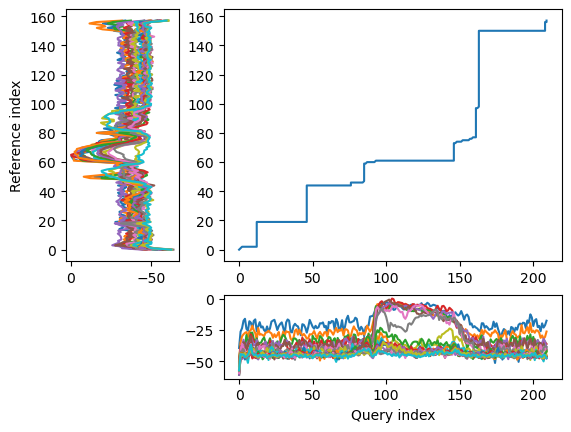

In [18]:
 #Perform DTW between songs 2 and 3
query = log_mel_specs[1]
template = log_mel_specs[2]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost3 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost:', normalized_alignment_cost3)

alignment.plot(type="threeway")

plt.show()


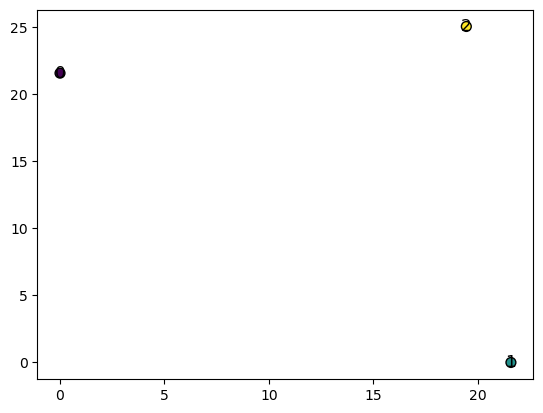

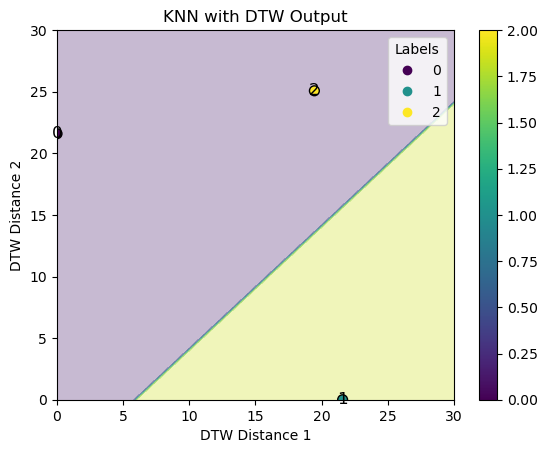

In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Sample DTW distances for three audio files [00,01,02|10,11,12|20,21,22]
dtw_distances = np.array([[0, normalized_alignment_cost1, normalized_alignment_cost2], [ normalized_alignment_cost1, 0, normalized_alignment_cost3], [ normalized_alignment_cost2,normalized_alignment_cost3, 0]])
# Labels for the audio files
labels = np.array([0, 1, 2])  # Example labels, replace with your actual labels

# Number of nearest neighbors to consider
k = 2

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier using the DTW distances and labels
knn.fit(dtw_distances, labels)

# Plot the decision boundary
plt.figure()
scatter = plt.scatter(dtw_distances[:, 0], dtw_distances[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')

# Add labels for data points
for i in range(len(dtw_distances)):
    plt.text(dtw_distances[i, 0], dtw_distances[i, 1], str(labels[i]), fontsize=12, ha='center', va='center')

# Create meshgrid for the contour plot
xx, yy, zz = np.meshgrid(np.linspace(0, 30, 100), np.linspace(0, 30, 100), np.linspace(0, 2.5, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

# Reshape the result for plotting
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure()
plt.contourf(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3, cmap='viridis')
# Scatter plot of the data
scatter = plt.scatter(dtw_distances[:, 0], dtw_distances[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')

# Add labels for data points
for i in range(len(dtw_distances)):
    plt.text(dtw_distances[i, 0], dtw_distances[i, 1], str(labels[i]), fontsize=12, ha='center', va='center')

plt.xlabel('DTW Distance 1')
plt.ylabel('DTW Distance 2')
plt.title('KNN with DTW Output')

# Adding legend
plt.legend(handles=scatter.legend_elements()[0], labels=[str(label) for label in labels], title="Labels")

plt.colorbar()
plt.show()
